In [6]:
# Initialize Otter
import otter
grader = otter.Notebook("lab1_explicit.ipynb")


# Coding Lab \#1 Part 1: explicit finite differences

```{grid} 2 2 2 2 
**explicit finite differences**
:::{figure} figures/AshesiETHLogo.png
:alt: figure of logos
:align: right
:width: 300px
:::
```

:::{admonition} How to use this notebook?
This notebook is made of text cells and code cells. The code cells have to be **executed** to see the result of the program. \
To execute a cell, simply select it and click on the "play" button \(&#9658;\) in the tool bar just above the notebook, or type `shift+enter`
It is important to execute the code cells in their order of appearance in the notebook.

**As a first step**: execute the very first OtterGrader code cell at the very top of this notebook. 

If you are running into any problems, try restarting the kernel and then see if the issue persists. 
:::

## Learning goals

After using this notebook, you should be able to:
* understand explicit finite differences and their numerical implementation
* understand stability criteria for explicit schemes 
* use Python to implement the explicit finite difference scheme discussed below

## Problem statement

Consider a bar that is mounted at $x=L$, i.e $u(L,t) = 0$, and initially at rest. Starting at time $t=0$, someone hits the free end of the bar at $x=0$ with a hammer, as shown below in [](#hammer). 

```{figure} figures/rod_hitting_hammer_2025.png
:name: hammer
:alt: figure hitting rod with hammer
:width: 400px
:align: center
```
This hitting leads to an imposed deformation, which we model as a displacement boundary condition as follows: 
$$ 	
u(0,t) = 
	\begin{cases}
	u_{max} \cdot \frac{1}{2} \cdot\left[1 - \cos(32\, \frac{c_1\,t}{L})\right] , & 0 \leq \frac{c_1\,t}{L} \leq \pi/16,\\
	0, & \text{else}.
	\end{cases}
    \label{Eq:BCs}
$$

We are aiming to simulate the longitudinal elastic waves propagating through this 1D bar which consists of two alloys, alloy 1 in the first section up $x = 0.6L$, and alloy 2 in the remaining length.
We know the wave speeds
$$ 	
c = 
	\begin{cases}
	c_1 = \sqrt{\frac{E_1}{ρ_1}} , & 0 \leq x \leq 0.6{L},\\
c_2 = \sqrt{\frac{E_2}{ρ_2}}  , & 0.6L < x \leq {L}
	\end{cases}
    \label{Eq:wave_speeds}
$$
with Young's moduli $E_1,E_2$ and densities $\rho_1,\rho_2$ for the two alloys, respectively. 

We showed in class that the displacement field $u(x, t)$ of a propagating 1D wave is governed by the wave equation
$$
\ddot{u} = c^2 u_{,xx} 
$$

Let us use a finite-difference (FD) scheme to simulate elastic stress waves as they travel through the bar and
are reflected at the fixed end. To this end, we discretize the bar both in time and space by increments of,
respectively, $\Delta t$ and $\Delta x$ to solve for displacements $u(x_j , t^\alpha ) = u^α_j$ at positions $x_j$ and time steps $t^α$ . 
For our FD scheme, let us use *central-difference approximations* both in space and in time.


Inserting the central difference approximations in space and time leads to 
$$
\frac{u_{j}^{\alpha +1} - 2 u_{j}^{\alpha} + u_{j}^{\alpha - 1}}{  (\Delta t)^2} = c^{2} \frac{u_{j+1}^{\alpha} - 2 u_{j}^{\alpha} + u_{j-1}^{\alpha}} { (\Delta x)^2 }
	+ O(\Delta x^2,\Delta t^2) 
$$    
and the update rule thus follows as 

$$
u_{j}^{\alpha+1} \approx \left(\frac{c\,\Delta t}{\Delta x}\right)^2 \left( u_{j+1}^{\alpha} - 2 u_{j}^{\alpha} + u_{j-1}^{\alpha}  \right) + 2 u_{j}^{\alpha} - u_{j}^{\alpha - 1}	
$$

with the corresponding stencil:

```{figure} figures/explicitWaveStencil.png
:name: stencil
:alt: figure finite difference stencil
:width: 200px
:align: center

finite difference stencil.
```

***
### problem 1 a)


<!-- BEGIN QUESTION -->

:::{admonition} submission requirement
:class: tip

We discretize the system in space into $n$ number of *nodes*, wich are connected by segments of length $\Delta x$. This in turn means that our displacement vector contains $n$ entries. 
We will introduce three displacement vectors, which we will update at each timestep. Namely two vectors containing information at the previous two time steps 

$\boldsymbol{U}$, which corresponds to all $u_{j}^\alpha$, 

$\boldsymbol{U}_{old}$, which corresponds to all $u_{j}^{\alpha-1}$ 

and finally, the displacements in the future, which we will solve for: 

$\boldsymbol{U}_{new}$, which corresponds to all $u_{j}^{\alpha+1}$.

Of course, we will have to update all vectors at the end of each timestep.

We know that the rod was at rest before we impose the displacement with the hammer. 
This in turn means that we know the initial conditions, namely all entries in $\boldsymbol{U}_{old}$ and $\boldsymbol{U}$ are zero.

How do you take care of the **boundary conditions** for this specific problem? Write out specifically which vector entries you will have to manipulate. 
Explain in the space below how you plan to enforce the boundary conditions.
:::


:::{admonition} How to use markdown to write your answer? (click on this box!)
:class: dropdown

You enter the cell by double-clicking and then you can start typing. Some useful tips:

Normal text you can just type. To write bold text, add \*\***around**\*\* the word and then it will appear in bold.

To write an **equation** you use the [LaTeX](https://www.latex-project.org/) maths environment (see e.g. [wikibooks](https://en.wikibooks.org/wiki/LaTeX/Mathematics)) by making use of the \$ signs as shown here for example:
\$ \$ ``` f(x) = \frac{1}{x} + b ```  \$ \$, which produces 
$$ 
f(x) = \frac{1}{x} + b  
$$

To render your cell, simply execute it clicking on the "play" button \(&#9658;\) in the tool bar just above the notebook, or type `shift+enter`.


:::

$u_1 = u(0,t)\quad \rightarrow \quad eq.(1)$

and

$u_n = u(x_n,t) = 0$

<!-- END QUESTION -->

***
### problem 1 b)

:::{admonition} submission requirement
:class: tip

Your task consists of writing a Python code that simulates the wave propagation in the bar and interpreting the results.

Implement the scheme numerically in Python using the provided skeleton code.
Assume the following parameters
\begin{equation}
	L = 1\ \text{m}, \qquad
	c_1 = 6320  \ \text{m/s}, \qquad
    c_2 = 3240 \ \text{m/s}, \qquad
	u_{max} = 0.8 \cdot10^{-3} \ \text{m}.
\end{equation}

Simulate the wave motion up to the maximum time $$
t_{ \text{max} } = 2L/c_1\ \, \text{s}, $$ 
using increments of 
\begin{equation} 
\Delta x= L / (n-1) \text{ m} \qquad \text{and} \qquad \Delta t = 10^{-7} \text{ s},
\end{equation}
where $n$ represents the number of *nodes* along your bar. Use $n=1001$ nodes.  



Use the provided plotting functions to visualize your results at the ten times $t = t_{ \text{max} } \cdot i/10$ with $i=1,\ldots,10$.
:::

## Coding

:::{admonition} Let us start by refreshing our Python knowledge. (click on this box!)
:class: dropdown

  Bear in mind that indentation is crucial when using python. 
  
  Some standard symbols you might use are:
  
  ```x*y``` for multiplication, ```x/y``` for division,  ```x**y``` which is equivalent to $x^y$, ```5e-2``` which is equivalent to $5 \cdot 10^{-2}$ 
  
  We will be making use of the numpy library for mathematical operations and treating arrays. 
  We import it
   ```python
  import numpy as np
  ```
  Whenever we want to use the functionality of numpy, we call it by using np.
  Some useful examples include initializing a vector of *size* filled with zeros: 
  ```python
  vectorA = np.zeros(size)
  ```
  Accessing the first (zeroth) entry of our vector can be done with ```vectorA[0]``` and the last one with ```vectorA[-1]``` and similarly all entries can be accessed via the ```[]``` operator. 
  
  To copy the contents of ```vectorA``` into ```vectorB``` the following sytnax can be used:
  ```python
  vectorB = vectorA.copy()
  ```
Be careful, setting
  ```python
  vectorB = vectorA
  ```
does not create a copy of ```vectorA```, rather ```vectorA``` now points to the same location in memory, where ```vectorB``` is stored. In short this means that if you change the contents of ```vectorA``` the same automatically is done to ```vectorB``` and vice versa.

Recall that we can use *while* loops, *for* loops, *if* statements and so on. Here it is crucial to use the correct indentation. 

We could for example write a for loop where we loop over all the ```i = 0, 1, ... ``` up to ```i = vectorA.size``` and write a little algorithm to update all components of ```vectorA```
 ```python
for i in range(vectorA.size):
    vectorA[i] = 2*i   
    # here we are still in the loop, let's for example print i to screen:
    print(i)
 
#here we are now outside the loop, have a look at the indentation
#note: the # symbol is used to write a comment.
```

:::

We need to import some useful Python libraries.
**Execute the code cell below** so that the necessary libraries are imported.

In [7]:
# we'll need numpy for some mathematical operations (e.g. cos/sin functions) and treating arrays
import numpy as np
# to compute square roots, etc. we'll use the math module
import math
# add the library folder to the path
import sys; sys.path.append('./lib')
# and we have our own plotting function, which does most of the work for us
from plotting_functions import plot_results

# display a message once all libraries are imported
print("Libraries imported.")

Libraries imported.


Next, we define the constants required for the numerical implementation and. Fill in the missing information: 

In [22]:
# ========================
# define input parameters:
# ========================
u_max = 0.8E-3           # amplitude of boundary condition applied [m]
L = 1                # length of the bar in [m]
n = 1001                # number of nodes along the length of the bar. [-]
delta_x = L/(n-1)          # delta x as we need this later [m]
x_positions = np.linspace(0, L, n) # given, position vector containing all j gridpoints

c_1  = 6320               # wave speed [m/s]
c_2  = 3240               # wave speed [m/s]
c = np.zeros(n)       # given, empty vector to store wavespeeds per gridpoint
for j in range(0,n):  # given, let's fill c up
    if x_positions[j]<= 0.6*L:
        c[j] = c_1
    else:
        c[j] = c_2



delta_t = 1E-7   # time step size
t_max = 2 * L / c_1   # given, max simulation time [s]  

In [23]:
grader.check("exp_input")

exp_input results: All test cases passed!
exp_input - 2 message: it seems like you defined the constants correctly

let's print some useful informatin to screen (given to you below): 

In [24]:
print("======================")
print("simulation start")
print("======================")
print(f"delta_x = {delta_x} and delta_t = {delta_t}")
print(f"c_1*delta_t / delta_x  = {c_1 * delta_t / delta_x}")
print(f"c_2*delta_t / delta_x = {c_2 * delta_t / delta_x}")
print("======================")

simulation start
delta_x = 0.001 and delta_t = 1e-07
c_1*delta_t / delta_x  = 0.632
c_2*delta_t / delta_x = 0.32399999999999995


Further, we have to initialize our vectors over which we will iterate, and finally, let's get to the heart piece of our code: let us implement the update rule together with the boundary conditions, as we step through time:

In [25]:
# initialize vectors as zeros to correct size:
U = np.zeros(n)                     # U @ talpha
U_old = np.zeros(n)                # U @ talpha-1
U_new = np.zeros(n)                # U @ talpha + 1

structDisp = [] # given! a list for saving results for plotting purposes

# loop over all time steps, given
for t in np.arange(0, t_max + delta_t, delta_t):

    # write your code here
    U_new = np.zeros(n)
    U_new[1:-1] = (c[1:-1]*delta_t/delta_x)**2 * \
                                (U[2:]-2*U[1:-1]+U[:-2])+2*U[1:-1]-U_old[1:-1]
    U_new[-1] = 0 
    if (c_1*t/L<=np.pi/16):
        U_new[0] = u_max/2*(1-np.cos(32*c_1*t/L))
    else:
        U_new[0] = 0
    U_old = U.copy()
    U = U_new.copy()
    
    # Let's save results for plotting later on (no changes required, just keep this piece of code):
    if t / t_max >= len(structDisp) / 10:
        print(f"Saving results for t = {t / t_max:.{2}f} * t_max")
        structDisp.append({"displacements": U_new.copy()})

print("simulation end")
print("======================")

Saving results for t = 0.00 * t_max
Saving results for t = 0.10 * t_max
Saving results for t = 0.20 * t_max
Saving results for t = 0.30 * t_max
Saving results for t = 0.40 * t_max
Saving results for t = 0.50 * t_max
Saving results for t = 0.60 * t_max
Saving results for t = 0.70 * t_max
Saving results for t = 0.80 * t_max
Saving results for t = 0.90 * t_max
Saving results for t = 1.00 * t_max
simulation end


In [26]:
grader.check("exp_updateLoop")

exp_updateLoop results: All test cases passed!
exp_updateLoop - 1 message: nice, you initialized U to the correct size!

Let us call the plotting function and take a look at the results (no changes required here, simply run the code cell below).

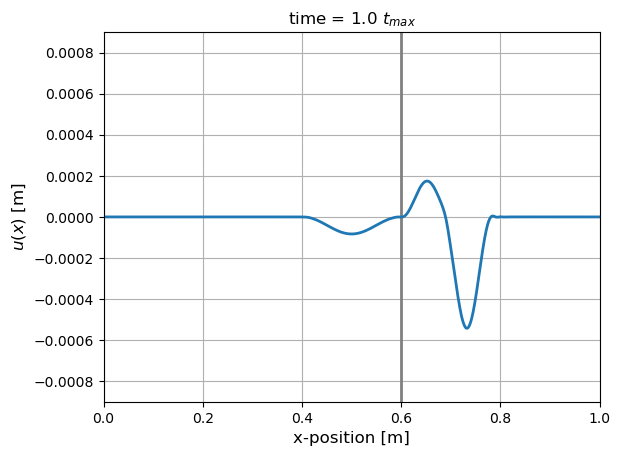

In [27]:
# Call the plotting function
plot_results(structDisp,L)

***
### problem 1 c)
%Choose a combination of $\Delta x$ and $ \Delta t $ that leads to numerical instability. Try it out in %your code so that you can see the plots of the unstable solution. Describe what you see below.

:::{admonition} submission requirement
:class: tip

Choosing $ \Delta t > \Delta x/c$ will lead to numerical instabilities in **material 1** (which has the larger wave speed ```c_1 > c_2```).

Find out about that by re-running your code with a $ \Delta t $ slightly larger than the limit for material 1, rounding the second decimal place (i.e. rounding z up, when using the following notation x.yz $\cdot 10^{-7}$) while keeping all other parameters unchanged. 

Describe in words how the plot looks like when you see the numerical instability caused by this $ \Delta t $ above the stable limit.

Use the space below to for your answer.
:::

In [16]:
delta_x/c_1

1.5822784810126582e-07

In [17]:
delta_t = 1.59E-7


:::{admonition} How to use markdown to write your answer? (click on this box!)
:class: dropdown

You enter the cell by double-clicking and then you can start typing. Some useful tips:

Normal text you can just type. To write bold text, add \*\***around**\*\* the word and then it will appear in bold.

To write an **equation** you use the [LaTeX](https://www.latex-project.org/) maths environment (see e.g. [wikibooks](https://en.wikibooks.org/wiki/LaTeX/Mathematics)) by making use of the \$ signs as shown here for example:
\$ \$ ``` f(x) = \frac{1}{x} + b ```  \$ \$, which produces 
$$ 
f(x) = \frac{1}{x} + b  
$$

To render your cell, simply execute it clicking on the "play" button \(&#9658;\) in the tool bar just above the notebook, or type `shift+enter`.


:::

The plot showed big oscillation which exceed the plotting range

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

***

## Closing remarks

When you reach this part of the script, your code should be running just fine. 
Further, you have taken some time to interpret some of the results. 


To close off this assignment on explicit finite differences, write down three points of what you have learned during this project in the provided space below. As a final point, you can also give an indication of how long it took you to complete this assignment. 

- I learnt about numerical implementation of explicit finite differences
- I learnt about how choice of spatial increment can affect the stability of explicit scheme
- I learnt about robust implementation of explicit finite difference scheme using python

This assignment took me about 30 min to complete

<!-- END QUESTION -->

:::{admonition} important
:class: attention

Make sure that **execute** the entire notebook with the values of $\Delta t$ and $n$ as asked for in problem 1b) (!), then **save** it under the name **lab1_explicit.ipynb**. 

Once you finished both **lab1_explicit.ipynb** and **lab1_implicit.ipynb**, go back to **Moodle to submit** your assignment. Submit your lab1 folder with all its dependencies. 

Make sure that your two notebooks are indeed called exactly **lab1_explicit.ipynb** and **lab1_implicit.ipynb**.

Best of luck! 
:::